# Sberbank Project

### 산경과 12학번 금승도, 이덕상

In [47]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


* Counts of null value in each columns

In [3]:
null_count_list = df.isnull().sum().tolist()
column_list = df.columns.values.tolist()
null_column_check = pd.DataFrame({'column': column_list, 'null_count': null_count_list})
null_column_check = null_column_check[null_column_check['null_count'] > 0]
null_column_check.sort_values('null_count', ascending = False)

,column,null_count
24,hospital_beds_raion,14441
7,build_year,13605
10,state,13559
161,cafe_sum_500_max_price_avg,13281
160,cafe_sum_500_min_price_avg,13281
162,cafe_avg_price_500,13281
5,max_floor,9572
6,material,9572
8,num_room,9572
9,kitch_sq,9572


* categorical value를 int 형 value로 변환하였다.

product_type, sub_area, culture_objects_top_25, thermal_power_plant_raion, incineration_raion, oil_chemistry_raion, radiation_raion, railroad_terminal_raion, big_market_raion, nuclear_reactor_raion, detention_facility_raion, water_1line, big_road1_1line, railroad_1line
은 categorical type

In [4]:
df.dtypes

id                                         int64
timestamp                                 object
full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school     

In [5]:
df.groupby('product_type').count()['id']

product_type
Investment       19448
OwnerOccupier    11023
Name: id, dtype: int64

In [6]:
sub_area_list = df.groupby('sub_area').groups.keys()
sub_area_code_list = np.arange(len(sub_area_list))
sub_area_code = pd.DataFrame({'sub_area': sub_area_list, 'code': sub_area_code_list})
sub_area_code.head()

,code,sub_area
0,0,Babushkinskoe
1,1,Ljublino
2,2,Hovrino
3,3,Tverskoe
4,4,Jakimanka


In [7]:
print(df.groupby('culture_objects_top_25').count()['id'])
print(df.groupby('thermal_power_plant_raion').count()['id'])
print(df.groupby('incineration_raion').count()['id'])
print(df.groupby('oil_chemistry_raion').count()['id'])
print(df.groupby('radiation_raion').count()['id'])
print(df.groupby('railroad_terminal_raion').count()['id'])
print(df.groupby('big_market_raion').count()['id'])
print(df.groupby('nuclear_reactor_raion').count()['id'])
print(df.groupby('detention_facility_raion').count()['id'])
print(df.groupby('water_1line').count()['id'])
print(df.groupby('big_road1_1line').count()['id'])
print(df.groupby('railroad_1line').count()['id'])

culture_objects_top_25
no     28543
yes     1928
Name: id, dtype: int64
thermal_power_plant_raion
no     28817
yes     1654
Name: id, dtype: int64
incineration_raion
no     28155
yes     2316
Name: id, dtype: int64
oil_chemistry_raion
no     30175
yes      296
Name: id, dtype: int64
radiation_raion
no     19600
yes    10871
Name: id, dtype: int64
railroad_terminal_raion
no     29335
yes     1136
Name: id, dtype: int64
big_market_raion
no     27649
yes     2822
Name: id, dtype: int64
nuclear_reactor_raion
no     29608
yes      863
Name: id, dtype: int64
detention_facility_raion
no     27427
yes     3044
Name: id, dtype: int64
water_1line
no     28134
yes     2337
Name: id, dtype: int64
big_road1_1line
no     29690
yes      781
Name: id, dtype: int64
railroad_1line
no     29578
yes      893
Name: id, dtype: int64


모든 categorical type value로 이상한 value가 들어가지 않은 것으로 확인됨




* caterogical value를 숫자로 변환 (no: 0, yes: 1)

In [8]:
df_revised = df.copy()
df_revised['product_type'] = df_revised['product_type'].eq('OwnerOccupier').mul(1)
df_revised['culture_objects_top_25'] = df_revised['culture_objects_top_25'].eq('yes').mul(1)
df_revised['thermal_power_plant_raion'] = df_revised['thermal_power_plant_raion'].eq('yes').mul(1)
df_revised['incineration_raion'] = df_revised['incineration_raion'].eq('yes').mul(1)
df_revised['oil_chemistry_raion'] = df_revised['oil_chemistry_raion'].eq('yes').mul(1)
df_revised['radiation_raion'] = df_revised['radiation_raion'].eq('yes').mul(1)
df_revised['railroad_terminal_raion'] = df_revised['railroad_terminal_raion'].eq('yes').mul(1)
df_revised['big_market_raion'] = df_revised['big_market_raion'].eq('yes').mul(1)
df_revised['nuclear_reactor_raion'] = df_revised['nuclear_reactor_raion'].eq('yes').mul(1)
df_revised['detention_facility_raion'] = df_revised['detention_facility_raion'].eq('yes').mul(1)
df_revised['water_1line'] = df_revised['water_1line'].eq('yes').mul(1)
df_revised['big_road1_1line'] = df_revised['big_road1_1line'].eq('yes').mul(1)
df_revised['railroad_1line'] = df_revised['railroad_1line'].eq('yes').mul(1)
df_revised.head()[['product_type', 'culture_objects_top_25', 'thermal_power_plant_raion']]
df_revised = df_revised.merge(sub_area_code, left_on='sub_area', right_on='sub_area', how='outer')

* state의 경우 value가 33인 경우가 존재한다. state의 경우 집의 등급을 매긴 것이고, 3을 33이라고 잘못 기입한 것으로 판단 3으로 수정하였다.

In [9]:
print(df_revised.groupby('state').count()['id'])
df_revised.loc[df_revised['state'] == 33, 'state'] = 3

state
1.0     4855
2.0     5844
3.0     5790
4.0      422
33.0       1
Name: id, dtype: int64


* sub_area별로 가격 분포를 그려보았다.

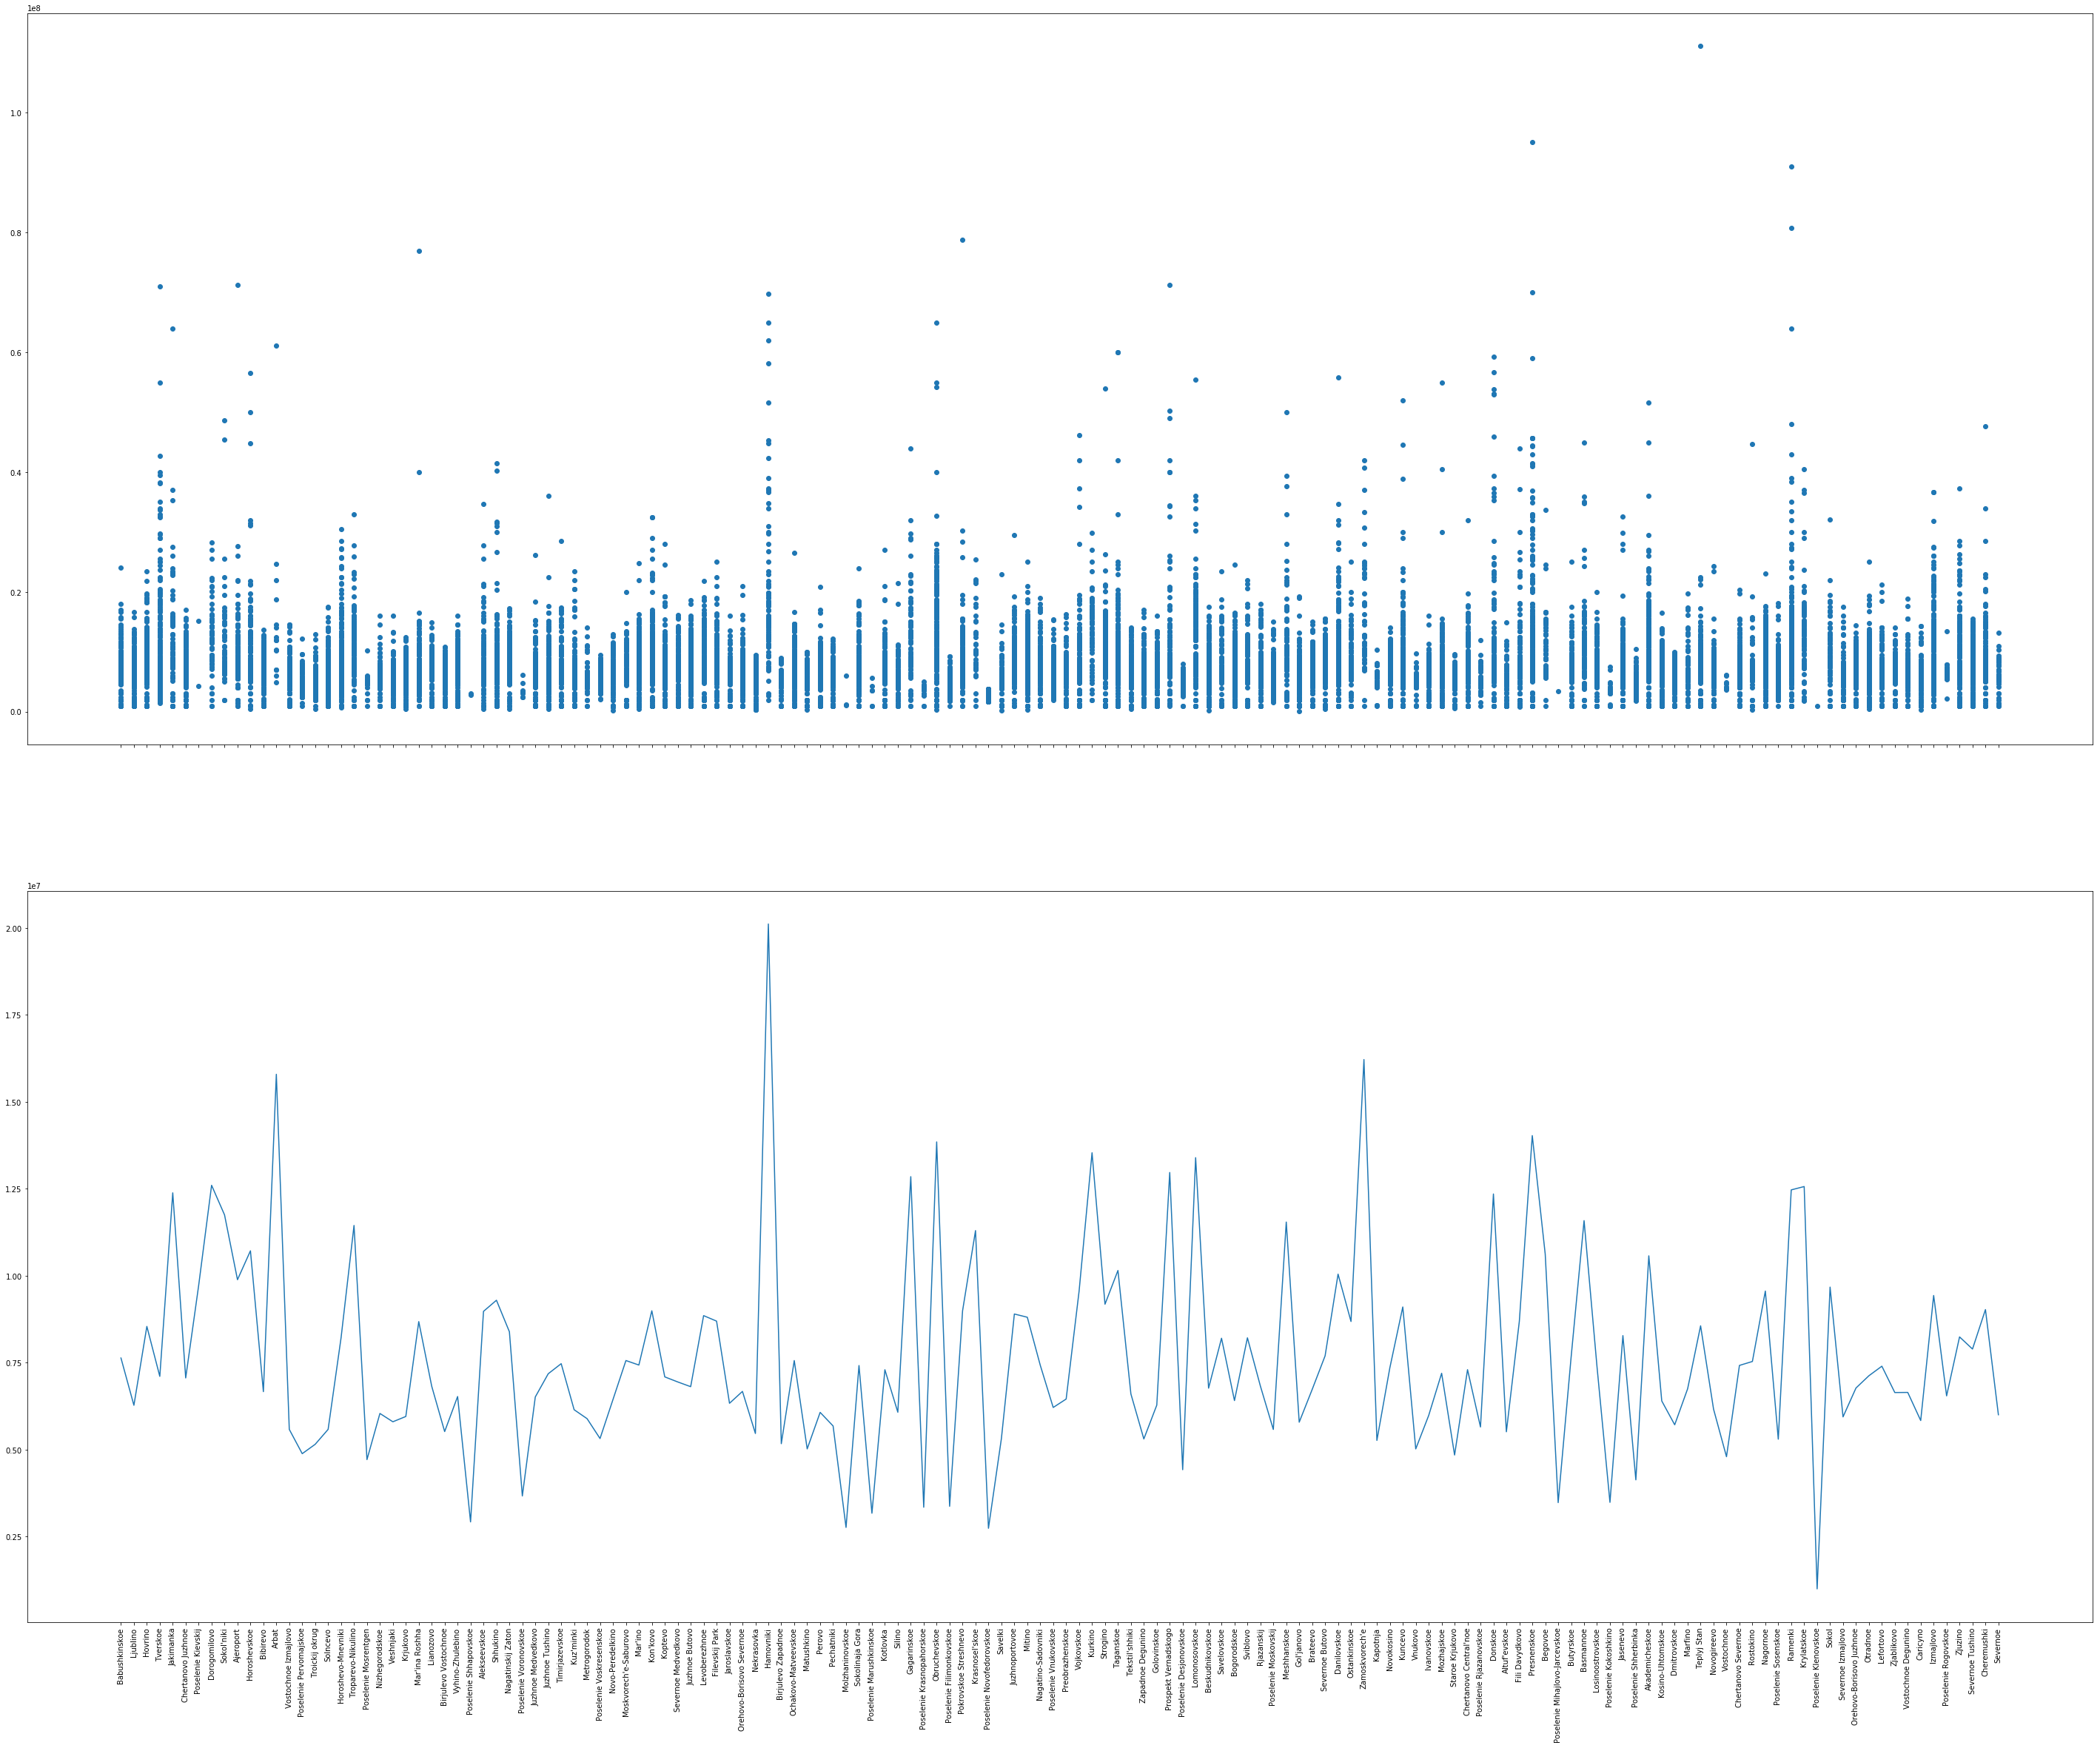

In [100]:
df_area_price = df_revised[['code', 'price_doc']]
df_area_price_mean = df_area_price.groupby('code').mean().reset_index()
f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (50,40))
plt.xticks(np.arange(len(sub_area_list)), sub_area_list, rotation=90)
ax1.scatter(df_area_price['code'].tolist(), df_area_price['price_doc'].tolist())
ax2.plot(df_area_price_mean['code'].tolist(), df_area_price_mean['price_doc'].tolist())
# plt.xticks(np.arange(len(sub_area_list)), sub_area_list, rotation=90)
plt.show()

In [101]:
# df_area_price_mean = df_area_price.groupby('code').mean()
# df_area_price_mean.plot(figsize=(50,10))
# plt.xticks(np.arange(len(sub_area_list)), sub_area_list, rotation=90)
# plt.show()

* state별로 price 분포를 그려보았다.

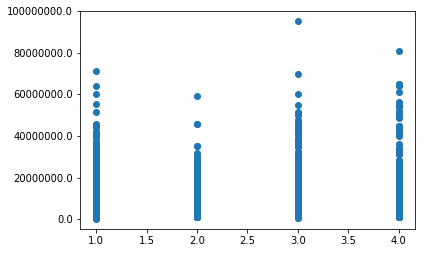

In [79]:
df_state_price = df_revised[['state', 'price_doc']]
plt.scatter(df_state_price['state'].tolist(), df_state_price['price_doc'].tolist())
ax = plt.gca()
ax.set_yticklabels(ax.get_yticks())
plt.show()

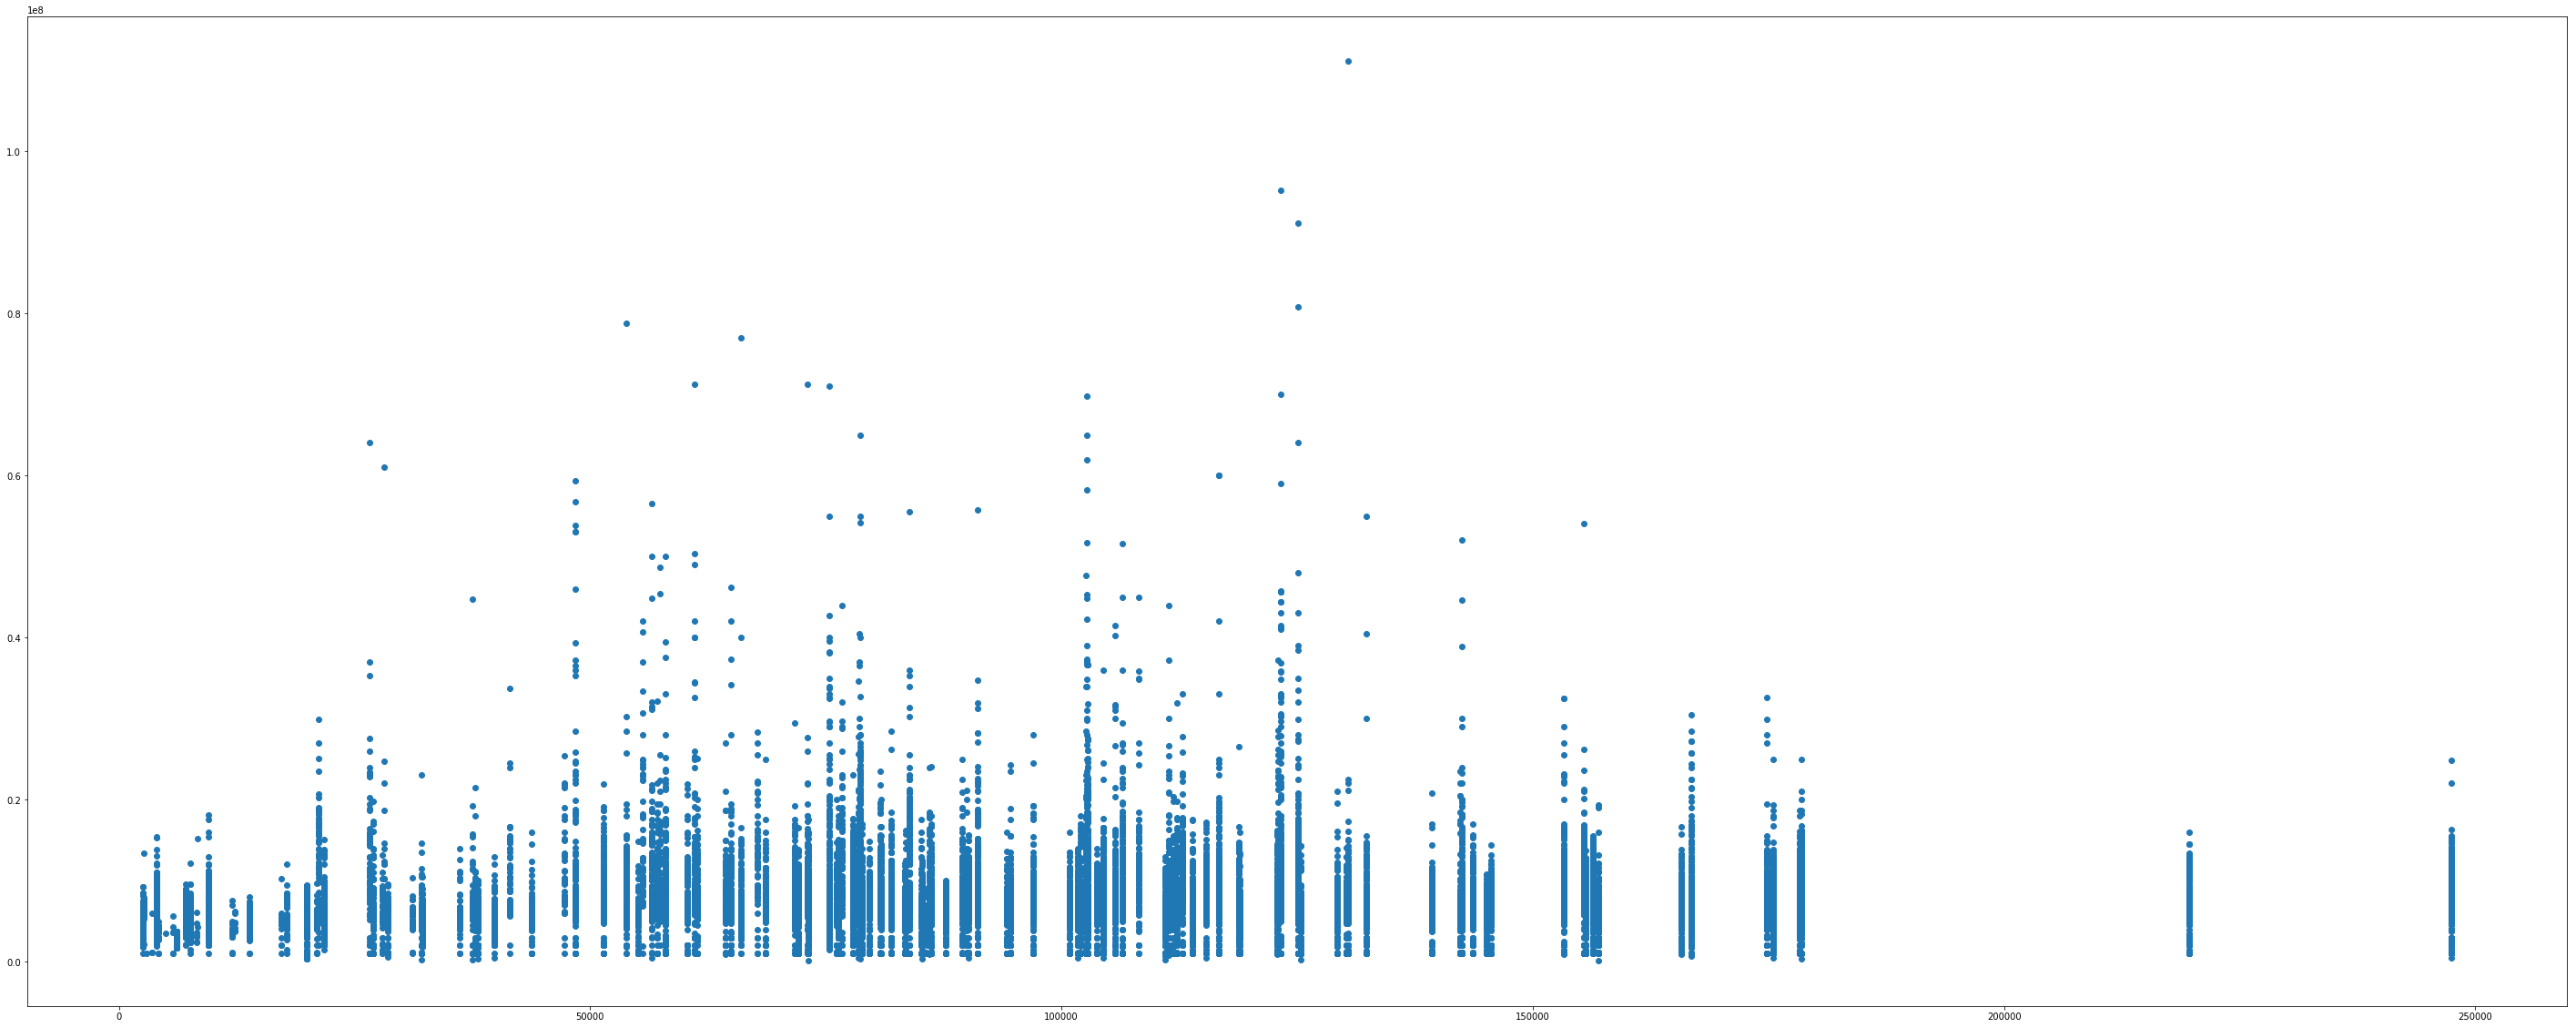

In [12]:
df_popul_price = df_revised[['raion_popul', 'price_doc']]
plt.figure(figsize=(50,20))
plt.scatter(df_popul_price['raion_popul'].tolist(), df_popul_price['price_doc'].tolist())
plt.show()

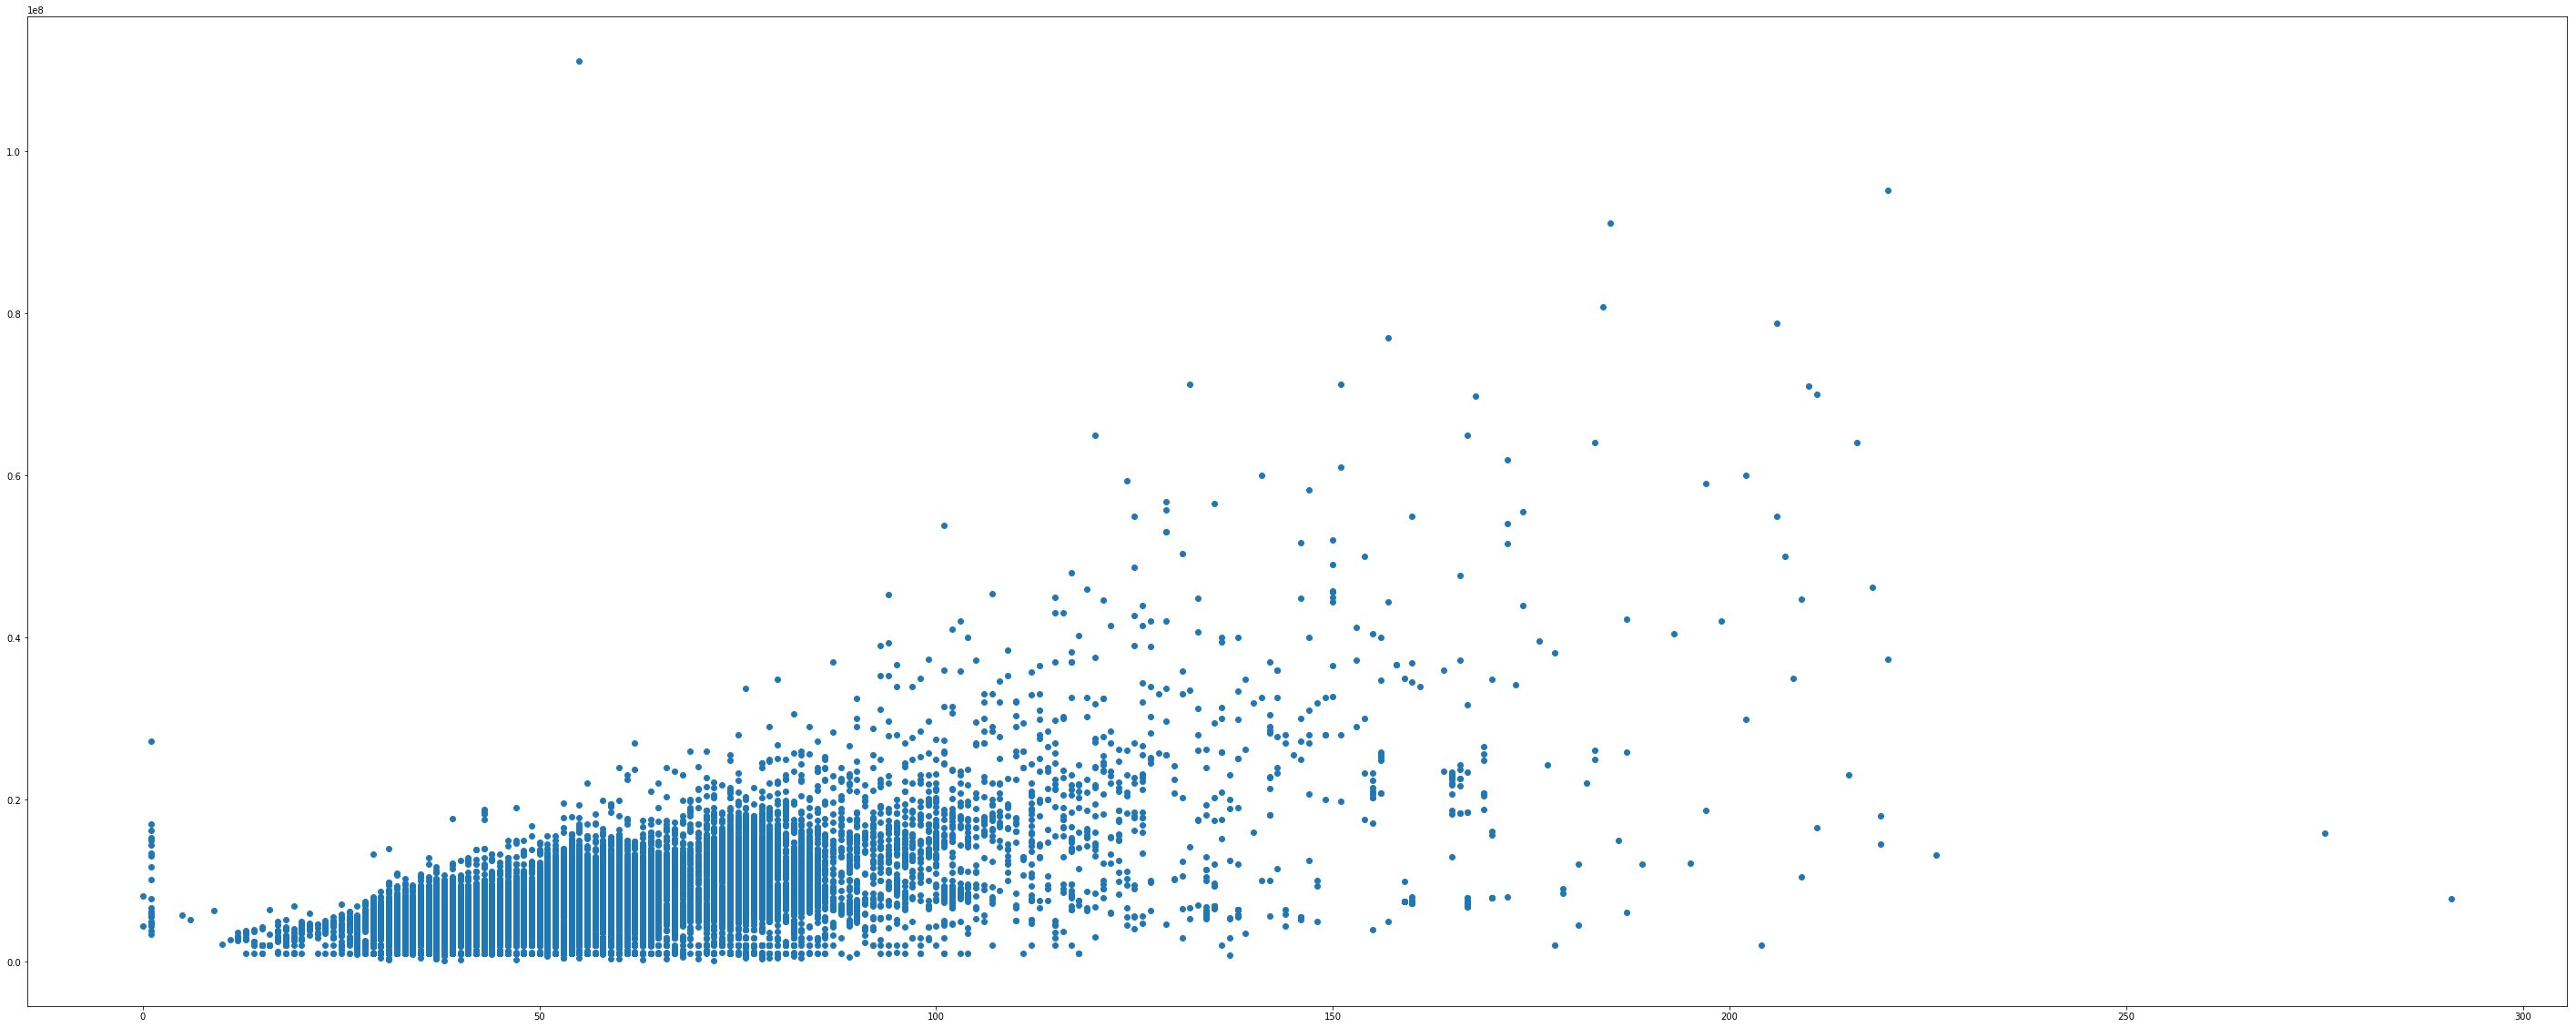

In [78]:
df_fullsq_price = df_revised[['full_sq','price_doc']]
plt.figure(figsize=(50,20))
df_fullsq_price = df_fullsq_price[df_fullsq_price['full_sq'] < 300]
plt.scatter(df_fullsq_price['full_sq'].tolist(), df_fullsq_price['price_doc'].tolist())
plt.show()

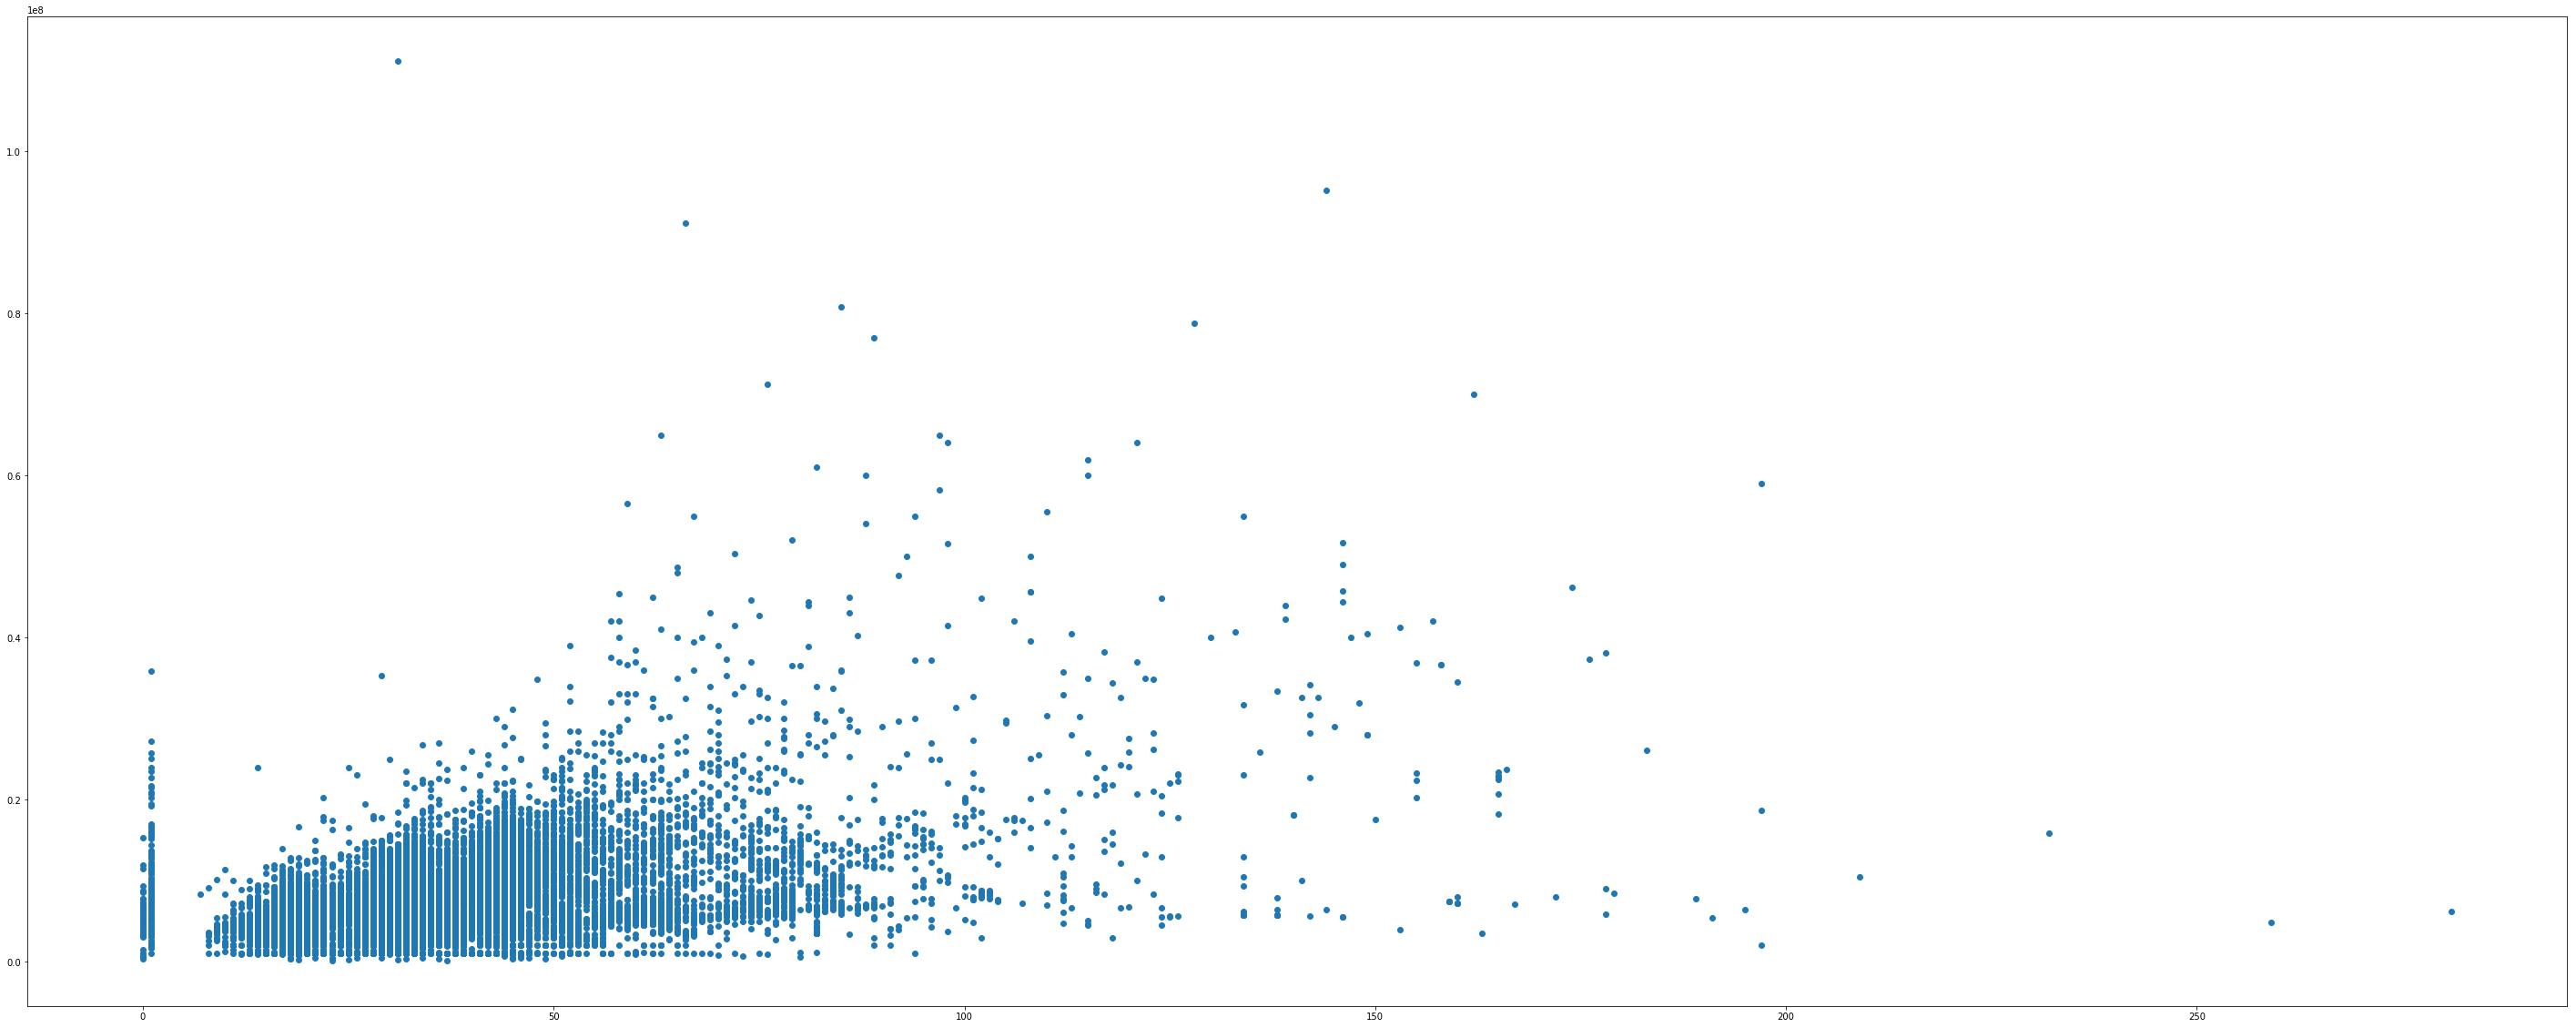

In [77]:
df_lifesq_price = df_revised[['life_sq','price_doc']]
plt.figure(figsize=(50,20))
df_lifesq_price = df_lifesq_price[df_lifesq_price['life_sq'] < 300]
plt.scatter(df_lifesq_price['life_sq'].tolist(), df_lifesq_price['price_doc'].tolist())
plt.show()

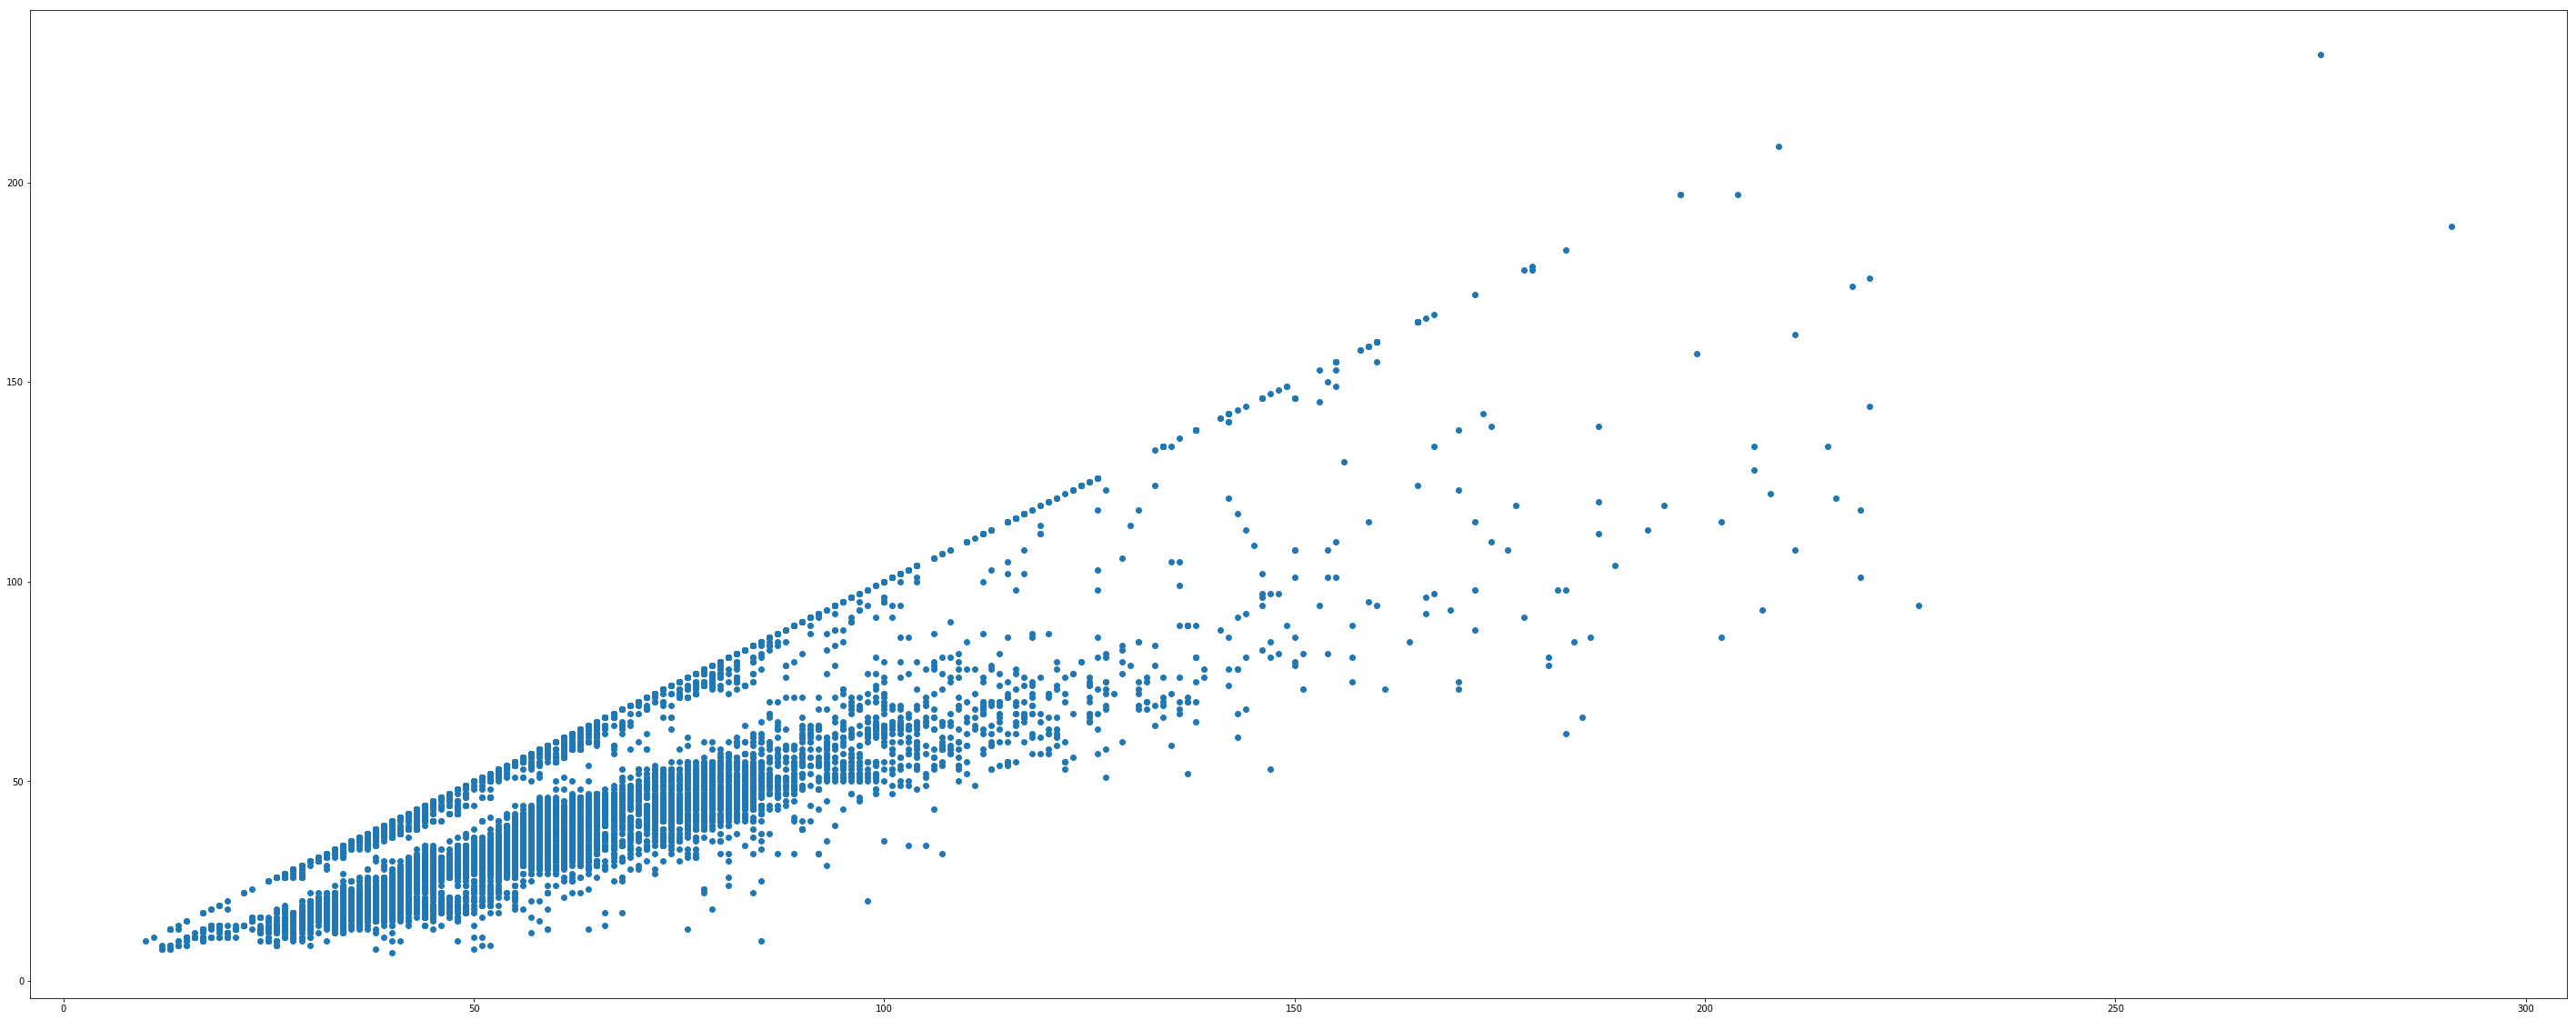

In [113]:
df_fullsq_lifesq = df_revised[['full_sq', 'life_sq']]
df_fullsq_lifesq = df_fullsq_lifesq[df_fullsq_lifesq['full_sq'] > 0]
df_fullsq_lifesq = df_fullsq_lifesq[df_fullsq_lifesq['life_sq'] > 0]
df_fullsq_lifesq = df_fullsq_lifesq[df_fullsq_lifesq['life_sq'] != 1]
df_fullsq_lifesq = df_fullsq_lifesq[df_fullsq_lifesq['life_sq'] <= df_fullsq_lifesq['full_sq']]
df_fullsq_lifesq = df_fullsq_lifesq[df_fullsq_lifesq['full_sq'] < 300]
df_fullsq_lifesq = df_fullsq_lifesq[df_fullsq_lifesq['life_sq'] < 300]
plt.figure(figsize=(50,20))
plt.scatter(df_fullsq_lifesq['full_sq'].tolist(), df_fullsq_lifesq['life_sq'].tolist())
plt.show()

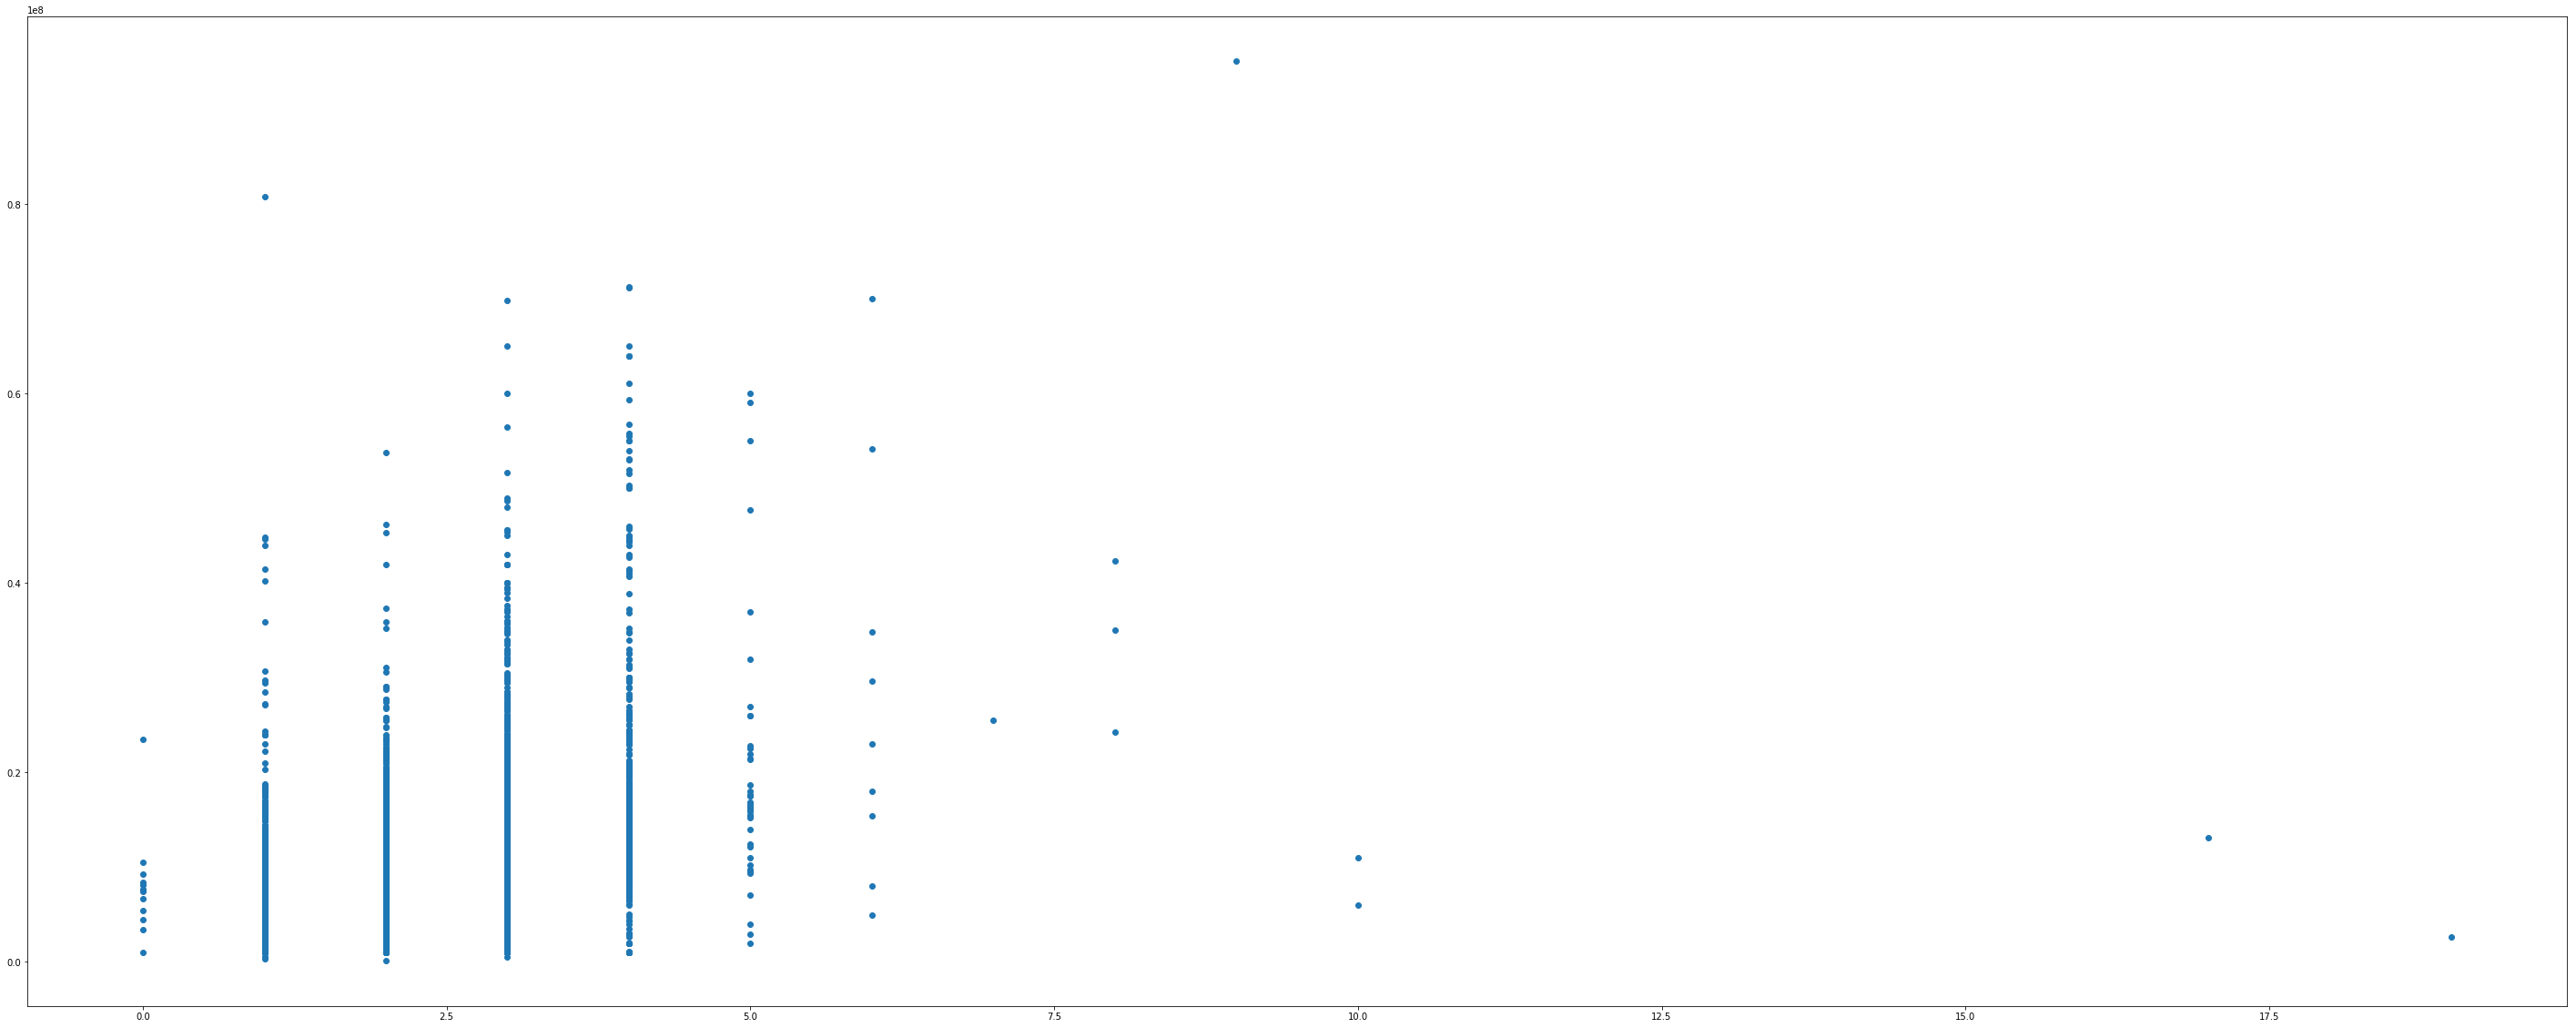

In [106]:
df_numroom_price = df_revised[['num_room', 'price_doc']]
plt.figure(figsize=(50,20))
plt.scatter(df_numroom_price['num_room'].tolist(), df_numroom_price['price_doc'].tolist())
plt.show()

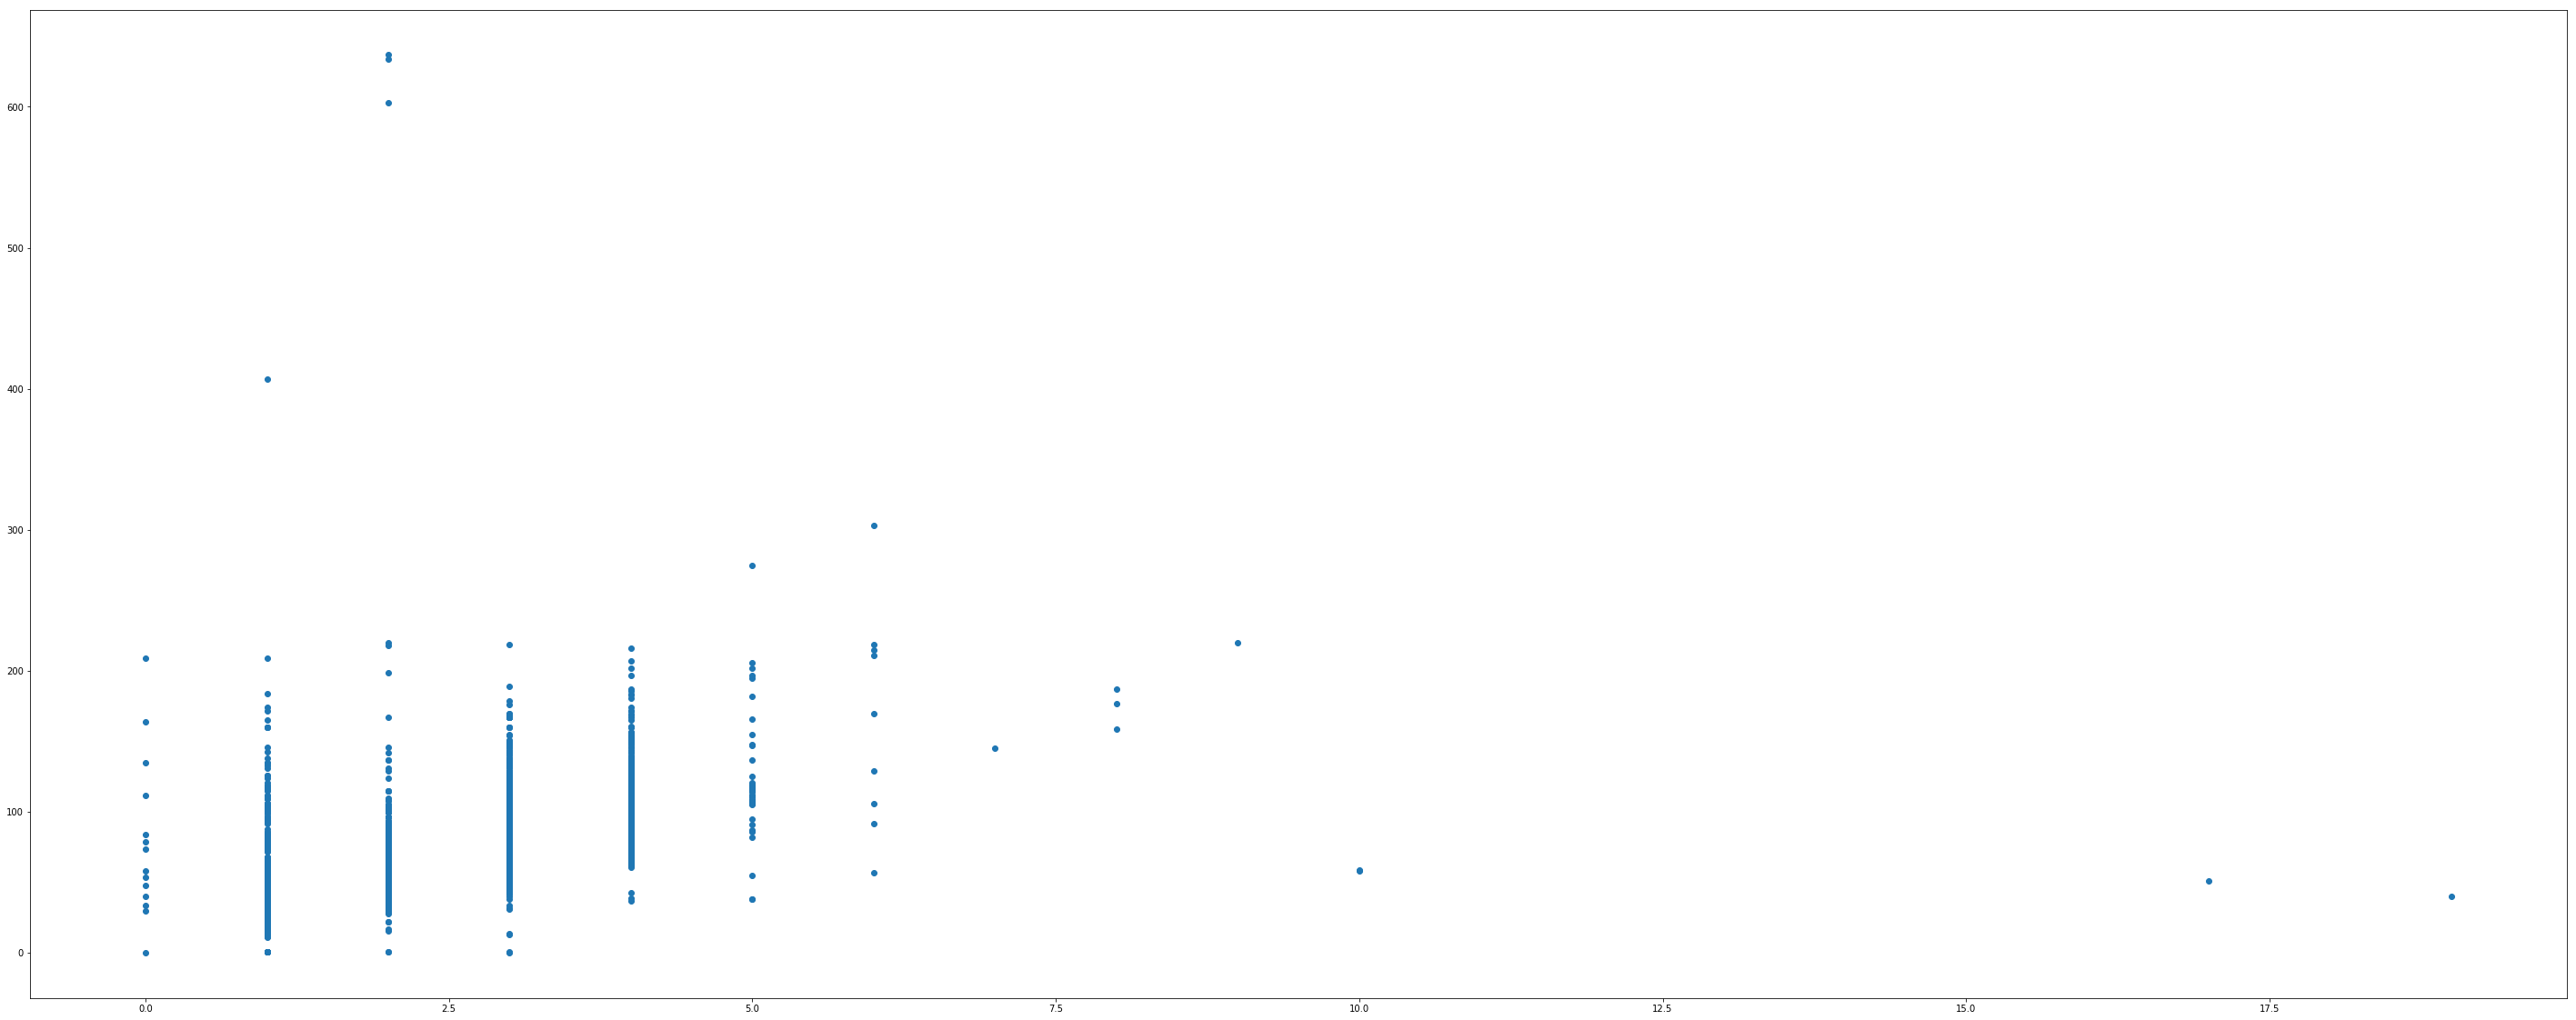

In [107]:
df_numroom_fullsq = df_revised[['num_room', 'full_sq']]
plt.figure(figsize=(50,20))
plt.scatter(df_numroom_fullsq['num_room'].tolist(), df_numroom_fullsq['full_sq'].tolist())
plt.show()

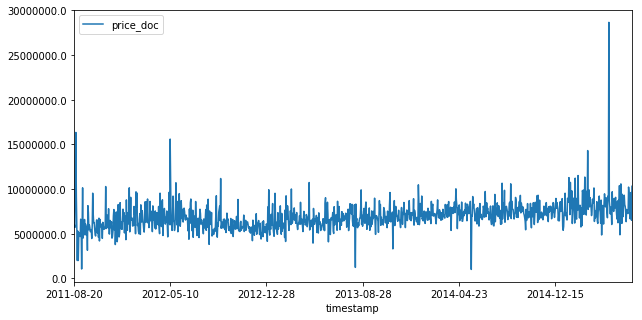

In [74]:
df_timestamp_price = df_revised[['timestamp', 'price_doc']]
df_timestamp_price = df_timestamp_price.groupby('timestamp').mean()
df_timestamp_price.plot(figsize = (10,5))
ax = plt.gca()
ax.set_yticklabels(ax.get_yticks())
plt.show()

In [50]:
# df_buildyear_price = df_revised[['build_year', 'price_doc']]
# plt.figure(figsize=(50,20))
# df_buildyear_price = df_buildyear_price[df_buildyear_price['build_year'] > 1000]
# plt.scatter(df_buildyear_price['build_year'].tolist(), df_buildyear_price['price_doc'].tolist())
# plt.show()

In [9]:
from sklearn.cluster import KMeans

In [129]:
# n_samples, n_features = df.shape
# estimator = KMeans(init='k-means++', n_clusters=10, n_init=10, verbose=1)
# estimator.fit(df)